In [1]:
import os
os.environ["HF_HOME"] = r"D:\hf-cache"

In [2]:
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training, TaskType, PeftModel
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from trl import AutoModelForCausalLMWithValueHead
from transformers import BitsAndBytesConfig  

lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    bias="none",
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj"], 
)

# ---- Device Setup ----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ---- Paths ----
MODEL_PATH = r"D:\kshitij-weights-folder\reward_model_best_20250505-030625\epoch_5"
PEFT_ADAPTER_PATH = r"D:\kshitij-weights-folder\reward_model_best_20250505-030625\epoch_5"

# ---- 1) 4-bit Quantization Configuration ----
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
)

# ---- 2) Load Base Model in 4-bit ----
base_model = AutoModelForCausalLM.from_pretrained(
    MODEL_PATH,
    quantization_config=bnb_config,
    device_map="auto",
)
# Prepare the model for k-bit training (this typically freezes most parameters except adapter ones)
base_model = prepare_model_for_kbit_training(base_model)
base_model.gradient_checkpointing_disable()  # Disable checkpointing

# ---- 3) Load Tokenizer ----
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# ---- 4) Load the PEFT Adapter (LoRA) ----
# This reloads your fine-tuned adapter weights onto your base model.
model_with_lora = PeftModel.from_pretrained(base_model, PEFT_ADAPTER_PATH)

# ---- 5) Convert to PPO-Compatible ValueHead Model ----
# When converting, pass the peft_config from the adapter model to ensure proper initialization.
model = AutoModelForCausalLMWithValueHead.from_pretrained(
    model_with_lora,
    peft_config=lora_config
).to(device)

model.config.return_dict=True

print("done")

C:\Users\BMSCE CSE.DESKTOP-IUB6THA\.conda\envs\kshitij\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\BMSCE CSE.DESKTOP-IUB6THA\.conda\envs\kshitij\Lib\site-packages\trl\trainer\ppo_config.py:141: UserWarning: The `optimize_cuda_cache` arguement will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(
C:\Users\BMSCE CSE.DESKTOP-IUB6THA\.conda\envs\kshitij\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Using device: cuda


Loading checkpoint shards: 100%|█████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.91s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


done


C:\Users\BMSCE CSE.DESKTOP-IUB6THA\.conda\envs\kshitij\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Using device: cuda for training
Starting enhanced reward-based training

Epoch 1/5


Epoch 1:   0%|                                                                                  | 0/40 [00:00<?, ?it/s]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.54it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.33it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.69it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:   2%|█▊                                                                        | 1/40 [00:37<24:14, 37.29s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:   5%|███▋                                                                      | 2/40 [01:13<23:22, 36.91s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.54it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.60it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:   8%|█████▌                                                                    | 3/40 [01:51<23:03, 37.40s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:11<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 17.93it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  10%|███████▍                                                                  | 4/40 [02:40<24:59, 41.66s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:22<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 22.09it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  12%|█████████▎                                                                | 5/40 [03:39<28:06, 48.18s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:21<00:00,  1.39it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 21.69it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  15%|███████████                                                               | 6/40 [04:38<29:19, 51.75s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.11it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.32it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  18%|████████████▉                                                             | 7/40 [05:15<25:51, 47.02s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.45it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  20%|██████████████▊                                                           | 8/40 [05:54<23:36, 44.28s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.46it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 13.10it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  22%|████████████████▋                                                         | 9/40 [06:39<22:58, 44.47s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.56it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.49it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.82it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  25%|██████████████████▎                                                      | 10/40 [07:19<21:33, 43.11s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.81it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  28%|████████████████████                                                     | 11/40 [07:55<19:51, 41.08s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.96it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.32it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  30%|█████████████████████▉                                                   | 12/40 [08:33<18:38, 39.96s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  32%|███████████████████████▋                                                 | 13/40 [09:09<17:34, 39.04s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.21it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  35%|█████████████████████████▌                                               | 14/40 [09:46<16:36, 38.32s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:15<00:00,  1.39it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 20.51it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  38%|███████████████████████████▍                                             | 15/40 [10:39<17:45, 42.61s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.08it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  40%|█████████████████████████████▏                                           | 16/40 [11:30<18:08, 45.36s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.93it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  42%|███████████████████████████████                                          | 17/40 [12:07<16:23, 42.74s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.36it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.67it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  45%|████████████████████████████████▊                                        | 18/40 [12:44<15:03, 41.06s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.75it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  48%|██████████████████████████████████▋                                      | 19/40 [13:21<13:56, 39.83s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.79it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.06it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  50%|████████████████████████████████████▌                                    | 20/40 [14:00<13:08, 39.41s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:16<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 19.24it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  52%|██████████████████████████████████████▎                                  | 21/40 [14:53<13:46, 43.52s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.56it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 21.33it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  55%|████████████████████████████████████████▏                                | 22/40 [15:44<13:45, 45.89s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.57it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 21.24it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  57%|█████████████████████████████████████████▉                               | 23/40 [16:39<13:47, 48.67s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.56it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.35it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  60%|███████████████████████████████████████████▊                             | 24/40 [17:17<12:04, 45.26s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.56it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.41it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  62%|█████████████████████████████████████████████▋                           | 25/40 [17:53<10:41, 42.74s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.53it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.32it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.37it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  65%|███████████████████████████████████████████████▍                         | 26/40 [18:32<09:38, 41.35s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.62it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.72it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  68%|█████████████████████████████████████████████████▎                       | 27/40 [19:11<08:48, 40.63s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:15<00:00,  1.40it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 21.57it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  70%|███████████████████████████████████████████████████                      | 28/40 [20:03<08:50, 44.17s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.15it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  72%|████████████████████████████████████████████████████▉                    | 29/40 [20:55<08:33, 46.64s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.66it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.90it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  75%|██████████████████████████████████████████████████████▊                  | 30/40 [21:33<07:19, 43.90s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.55it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.42it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  78%|████████████████████████████████████████████████████████▌                | 31/40 [22:11<06:19, 42.12s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.36it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 18.93it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  80%|██████████████████████████████████████████████████████████▍              | 32/40 [23:03<06:01, 45.20s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.62it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.78it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  82%|████████████████████████████████████████████████████████████▏            | 33/40 [23:42<05:03, 43.29s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.94it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.64it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  85%|██████████████████████████████████████████████████████████████           | 34/40 [24:20<04:09, 41.58s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.85it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  88%|███████████████████████████████████████████████████████████████▉         | 35/40 [24:56<03:20, 40.01s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.12it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.65it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  90%|█████████████████████████████████████████████████████████████████▋       | 36/40 [25:33<02:36, 39.20s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.56it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.38it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  92%|███████████████████████████████████████████████████████████████████▌     | 37/40 [26:10<01:55, 38.49s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.46it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.39it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 22.21it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  95%|█████████████████████████████████████████████████████████████████████▎   | 38/40 [27:05<01:26, 43.47s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.35it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.80it/s]


Evaluating relevance of 4 samples !!!



Epoch 1:  98%|███████████████████████████████████████████████████████████████████████▏ | 39/40 [27:43<00:41, 41.70s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.36it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.04it/s]


Evaluating relevance of 4 samples !!!



Epoch 1: 100%|█████████████████████████████████████████████████████████████████████████| 40/40 [28:21<00:00, 42.54s/it]
C:\Users\BMSCE CSE.DESKTOP-IUB6THA\.conda\envs\kshitij\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Epoch 2/5


Epoch 2:   0%|                                                                                  | 0/40 [00:00<?, ?it/s]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.48it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.59it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:   2%|█▊                                                                        | 1/40 [00:39<25:43, 39.57s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.45it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.64it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.70it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:   5%|███▋                                                                      | 2/40 [01:17<24:27, 38.63s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.84it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:   8%|█████▌                                                                    | 3/40 [01:55<23:38, 38.34s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:14<00:00,  1.43it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 19.23it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  10%|███████▍                                                                  | 4/40 [02:47<26:08, 43.57s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.77it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  12%|█████████▎                                                                | 5/40 [03:23<23:56, 41.03s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.57it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  15%|███████████                                                               | 6/40 [04:00<22:20, 39.44s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.92it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.54it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  18%|████████████▉                                                             | 7/40 [04:37<21:21, 38.85s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:16<00:00,  1.40it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 20.32it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  20%|██████████████▊                                                           | 8/40 [05:30<23:05, 43.30s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.70it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.98it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  22%|████████████████▋                                                         | 9/40 [06:06<21:09, 40.97s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.41it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 21.91it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  25%|██████████████████▎                                                      | 10/40 [07:00<22:30, 45.02s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.57it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.10it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  28%|████████████████████                                                     | 11/40 [07:37<20:31, 42.45s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.46it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  30%|█████████████████████▉                                                   | 12/40 [08:13<19:01, 40.77s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:08<00:00,  1.51it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 14.17it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  32%|███████████████████████▋                                                 | 13/40 [08:58<18:55, 42.04s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  35%|█████████████████████████▌                                               | 14/40 [09:35<17:29, 40.37s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.15it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.40it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  38%|███████████████████████████▍                                             | 15/40 [10:12<16:22, 39.29s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.91it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.32it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  40%|█████████████████████████████▏                                           | 16/40 [10:50<15:32, 38.84s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.38it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  42%|███████████████████████████████                                          | 17/40 [11:26<14:36, 38.12s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  45%|████████████████████████████████▊                                        | 18/40 [12:02<13:47, 37.61s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:15<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 21.37it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  48%|██████████████████████████████████▋                                      | 19/40 [12:49<14:09, 40.46s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.41it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 22.55it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  50%|████████████████████████████████████▌                                    | 20/40 [13:44<14:51, 44.55s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:15<00:00,  1.40it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 21.88it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  52%|██████████████████████████████████████▎                                  | 21/40 [14:36<14:49, 46.79s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.69it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.13it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.80it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  55%|████████████████████████████████████████▏                                | 22/40 [15:12<13:08, 43.78s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.38it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.35it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  57%|█████████████████████████████████████████▉                               | 23/40 [15:49<11:47, 41.61s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.70it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.90it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  60%|███████████████████████████████████████████▊                             | 24/40 [16:41<11:53, 44.62s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.39it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.71it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  62%|█████████████████████████████████████████████▋                           | 25/40 [17:17<10:33, 42.26s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.06it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  65%|███████████████████████████████████████████████▍                         | 26/40 [17:55<09:33, 40.93s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:21<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.74it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  68%|█████████████████████████████████████████████████▎                       | 27/40 [18:53<09:58, 46.00s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.43it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.16it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  70%|███████████████████████████████████████████████████                      | 28/40 [19:31<08:44, 43.72s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:11<00:00,  1.41it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 18.32it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  72%|████████████████████████████████████████████████████▉                    | 29/40 [20:19<08:14, 44.92s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.56it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.64it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  75%|██████████████████████████████████████████████████████▊                  | 30/40 [20:58<07:09, 42.99s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  78%|████████████████████████████████████████████████████████▌                | 31/40 [21:34<06:09, 41.08s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.56it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.52it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  80%|██████████████████████████████████████████████████████████▍              | 32/40 [22:13<05:22, 40.32s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:21<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 22.30it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  82%|████████████████████████████████████████████████████████████▏            | 33/40 [23:11<05:20, 45.80s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.41it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  85%|██████████████████████████████████████████████████████████████           | 34/40 [23:48<04:17, 42.97s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.15it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  88%|███████████████████████████████████████████████████████████████▉         | 35/40 [24:39<03:47, 45.56s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.63it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  90%|█████████████████████████████████████████████████████████████████▋       | 36/40 [25:17<02:52, 43.09s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.97it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.09it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  92%|███████████████████████████████████████████████████████████████████▌     | 37/40 [25:54<02:03, 41.26s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 22.26it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  95%|█████████████████████████████████████████████████████████████████████▎   | 38/40 [26:45<01:28, 44.42s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


Evaluating relevance of 4 samples !!!



Epoch 2:  98%|███████████████████████████████████████████████████████████████████████▏ | 39/40 [27:22<00:42, 42.05s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.96it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.91it/s]


Evaluating relevance of 4 samples !!!



Epoch 2: 100%|█████████████████████████████████████████████████████████████████████████| 40/40 [27:59<00:00, 41.98s/it]



Epoch 3/5


Epoch 3:   0%|                                                                                  | 0/40 [00:00<?, ?it/s]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:15<00:00,  1.39it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 22.17it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:   2%|█▊                                                                        | 1/40 [00:51<33:45, 51.94s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.72it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.97it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:   5%|███▋                                                                      | 2/40 [01:27<26:48, 42.34s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.57it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.68it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:   8%|█████▌                                                                    | 3/40 [02:04<24:32, 39.80s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.97it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.62it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  10%|███████▍                                                                  | 4/40 [02:41<23:08, 38.58s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:15<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 20.06it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  12%|█████████▎                                                                | 5/40 [03:33<25:23, 43.52s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.54it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  15%|███████████                                                               | 6/40 [04:11<23:43, 41.86s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.96it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.07it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  18%|████████████▉                                                             | 7/40 [04:49<22:10, 40.31s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.80it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.40it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  20%|██████████████▊                                                           | 8/40 [05:26<21:04, 39.50s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.40it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  22%|████████████████▋                                                         | 9/40 [06:03<19:53, 38.51s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.70it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  25%|██████████████████▎                                                      | 10/40 [06:39<18:57, 37.90s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.25it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  28%|████████████████████                                                     | 11/40 [07:15<18:02, 37.33s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.00it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  30%|█████████████████████▉                                                   | 12/40 [07:52<17:17, 37.05s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.89it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  32%|███████████████████████▋                                                 | 13/40 [08:43<18:37, 41.40s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.71it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.56it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.44it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  35%|█████████████████████████▌                                               | 14/40 [09:21<17:25, 40.21s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  38%|███████████████████████████▍                                             | 15/40 [09:57<16:16, 39.07s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  40%|█████████████████████████████▏                                           | 16/40 [10:33<15:19, 38.29s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.56it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.58it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  42%|███████████████████████████████                                          | 17/40 [11:11<14:33, 37.98s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:21<00:00,  1.40it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 22.04it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  45%|████████████████████████████████▊                                        | 18/40 [12:09<16:08, 44.02s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.77it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  48%|██████████████████████████████████▋                                      | 19/40 [13:00<16:07, 46.05s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.56it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.73it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  50%|████████████████████████████████████▌                                    | 20/40 [13:38<14:34, 43.73s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.70it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.75it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  52%|██████████████████████████████████████▎                                  | 21/40 [14:15<13:13, 41.75s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.83it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.89it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  55%|████████████████████████████████████████▏                                | 22/40 [14:51<12:01, 40.06s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.97it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  57%|█████████████████████████████████████████▉                               | 23/40 [15:28<11:05, 39.17s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.94it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  60%|███████████████████████████████████████████▊                             | 24/40 [16:05<10:15, 38.49s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:18<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 21.66it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  62%|█████████████████████████████████████████████▋                           | 25/40 [17:00<10:50, 43.38s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.40it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.13it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  65%|███████████████████████████████████████████████▍                         | 26/40 [17:51<10:38, 45.64s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.71it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.08it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  68%|█████████████████████████████████████████████████▎                       | 27/40 [18:27<09:15, 42.76s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.47it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.42it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  70%|███████████████████████████████████████████████████                      | 28/40 [19:05<08:14, 41.23s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.40it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 21.90it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  72%|████████████████████████████████████████████████████▉                    | 29/40 [19:56<08:07, 44.31s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.81it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  75%|██████████████████████████████████████████████████████▊                  | 30/40 [20:33<07:01, 42.19s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:10<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 17.50it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  78%|████████████████████████████████████████████████████████▌                | 31/40 [21:20<06:33, 43.70s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.30it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  80%|██████████████████████████████████████████████████████████▍              | 32/40 [21:58<05:35, 41.90s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.36it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.64it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  82%|████████████████████████████████████████████████████████████▏            | 33/40 [22:50<05:14, 44.88s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.70it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  85%|██████████████████████████████████████████████████████████████           | 34/40 [23:27<04:14, 42.41s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.89it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  88%|███████████████████████████████████████████████████████████████▉         | 35/40 [24:03<03:22, 40.51s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.41it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 22.49it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  90%|█████████████████████████████████████████████████████████████████▋       | 36/40 [24:57<02:58, 44.65s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:22<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 22.53it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  92%|███████████████████████████████████████████████████████████████████▌     | 37/40 [25:57<02:27, 49.16s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  95%|█████████████████████████████████████████████████████████████████████▎   | 38/40 [26:33<01:30, 45.41s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.81it/s]


Evaluating relevance of 4 samples !!!



Epoch 3:  98%|███████████████████████████████████████████████████████████████████████▏ | 39/40 [27:10<00:42, 42.86s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.56it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:09<00:00,  1.44it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 13.91it/s]


Evaluating relevance of 4 samples !!!



Epoch 3: 100%|█████████████████████████████████████████████████████████████████████████| 40/40 [27:56<00:00, 41.91s/it]



Epoch 4/5


Epoch 4:   0%|                                                                                  | 0/40 [00:00<?, ?it/s]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.72it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:   2%|█▊                                                                        | 1/40 [00:53<34:47, 53.53s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:15<00:00,  1.42it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 19.69it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:   5%|███▋                                                                      | 2/40 [01:45<33:22, 52.71s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:20<00:00,  1.39it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.21it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:   8%|█████▌                                                                    | 3/40 [02:43<33:49, 54.84s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.86it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  10%|███████▍                                                                  | 4/40 [03:18<28:25, 47.37s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 21.84it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  12%|█████████▎                                                                | 5/40 [04:10<28:30, 48.88s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.70it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:11<00:00,  1.36it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 17.95it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  15%|███████████                                                               | 6/40 [04:58<27:32, 48.59s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.13it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.34it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  18%|████████████▉                                                             | 7/40 [05:35<24:36, 44.75s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.64it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  20%|██████████████▊                                                           | 8/40 [06:12<22:36, 42.38s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.69it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  22%|████████████████▋                                                         | 9/40 [06:49<21:04, 40.78s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.36it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.66it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  25%|██████████████████▎                                                      | 10/40 [07:26<19:45, 39.50s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:08<00:00,  1.48it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 13.99it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  28%|████████████████████                                                     | 11/40 [08:11<19:54, 41.19s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.13it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.39it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  30%|█████████████████████▉                                                   | 12/40 [08:48<18:39, 39.98s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.47it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.51it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  32%|███████████████████████▋                                                 | 13/40 [09:26<17:39, 39.23s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.82it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  35%|█████████████████████████▌                                               | 14/40 [10:03<16:43, 38.61s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.95it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  38%|███████████████████████████▍                                             | 15/40 [10:54<17:35, 42.20s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.25it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  40%|█████████████████████████████▏                                           | 16/40 [11:30<16:08, 40.37s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:14<00:00,  1.42it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.77it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  42%|███████████████████████████████                                          | 17/40 [12:21<16:44, 43.66s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.56it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.81it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.14it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  45%|████████████████████████████████▊                                        | 18/40 [12:58<15:17, 41.69s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.85it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  48%|██████████████████████████████████▋                                      | 19/40 [13:34<14:00, 40.03s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.78it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  50%|████████████████████████████████████▌                                    | 20/40 [14:12<13:04, 39.23s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.70it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.73it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  52%|██████████████████████████████████████▎                                  | 21/40 [14:48<12:08, 38.32s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.96it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.86it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  55%|████████████████████████████████████████▏                                | 22/40 [15:25<11:23, 37.96s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.69it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:23<00:00,  1.39it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 22.78it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  57%|█████████████████████████████████████████▉                               | 23/40 [16:25<12:40, 44.75s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.98it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  60%|███████████████████████████████████████████▊                             | 24/40 [17:02<11:15, 42.23s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:16<00:00,  1.40it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 20.01it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  62%|█████████████████████████████████████████████▋                           | 25/40 [17:55<11:21, 45.43s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.55it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:15<00:00,  1.41it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 22.15it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  65%|███████████████████████████████████████████████▍                         | 26/40 [18:47<11:03, 47.39s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.56it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.07it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  68%|█████████████████████████████████████████████████▎                       | 27/40 [19:25<09:40, 44.62s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.55it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.40it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 22.09it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  70%|███████████████████████████████████████████████████                      | 28/40 [20:19<09:30, 47.53s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.91it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.88it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  72%|████████████████████████████████████████████████████▉                    | 29/40 [20:57<08:10, 44.64s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:16<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 21.35it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  75%|██████████████████████████████████████████████████████▊                  | 30/40 [21:49<07:49, 46.96s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.91it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  78%|████████████████████████████████████████████████████████▌                | 31/40 [22:25<06:32, 43.66s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.69it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.41it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.99it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  80%|██████████████████████████████████████████████████████████▍              | 32/40 [23:02<05:32, 41.56s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.27it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  82%|████████████████████████████████████████████████████████████▏            | 33/40 [23:40<04:42, 40.42s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.14it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.68it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  85%|██████████████████████████████████████████████████████████████           | 34/40 [24:17<03:56, 39.36s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.56it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.31it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  88%|███████████████████████████████████████████████████████████████▉         | 35/40 [24:53<03:11, 38.38s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.42it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  90%|█████████████████████████████████████████████████████████████████▋       | 36/40 [25:29<02:31, 37.77s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.78it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  92%|███████████████████████████████████████████████████████████████████▌     | 37/40 [26:05<01:51, 37.33s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.67it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  95%|█████████████████████████████████████████████████████████████████████▎   | 38/40 [26:42<01:14, 37.14s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.58it/s]


Evaluating relevance of 4 samples !!!



Epoch 4:  98%|███████████████████████████████████████████████████████████████████████▏ | 39/40 [27:20<00:37, 37.24s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.14it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.89it/s]


Evaluating relevance of 4 samples !!!



Epoch 4: 100%|█████████████████████████████████████████████████████████████████████████| 40/40 [27:56<00:00, 41.92s/it]



Epoch 5/5


Epoch 5:   0%|                                                                                  | 0/40 [00:00<?, ?it/s]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.43it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.03it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:   2%|█▊                                                                        | 1/40 [00:36<23:54, 36.79s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.79it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:   5%|███▋                                                                      | 2/40 [01:12<23:03, 36.41s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.98it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:   8%|█████▌                                                                    | 3/40 [02:03<26:33, 43.06s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.72it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  10%|███████▍                                                                  | 4/40 [02:41<24:27, 40.78s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:16<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 21.29it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  12%|█████████▎                                                                | 5/40 [03:33<26:13, 44.95s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.35it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.90it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  15%|███████████                                                               | 6/40 [04:10<23:52, 42.13s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.53it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  18%|████████████▉                                                             | 7/40 [04:47<22:15, 40.46s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.71it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:16<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 20.01it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  20%|██████████████▊                                                           | 8/40 [05:39<23:35, 44.22s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:15<00:00,  1.41it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 19.92it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  22%|████████████████▋                                                         | 9/40 [06:31<24:05, 46.62s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:21<00:00,  1.39it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 21.75it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  25%|██████████████████▎                                                      | 10/40 [07:29<25:05, 50.17s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.18it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  28%|████████████████████                                                     | 11/40 [08:05<22:08, 45.82s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  30%|█████████████████████▉                                                   | 12/40 [08:41<20:03, 42.98s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.86it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  32%|███████████████████████▋                                                 | 13/40 [09:18<18:31, 41.16s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.37it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  35%|█████████████████████████▌                                               | 14/40 [09:55<17:11, 39.67s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  38%|███████████████████████████▍                                             | 15/40 [10:31<16:07, 38.69s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:22<00:00,  1.40it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 22.46it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  40%|█████████████████████████████▏                                           | 16/40 [11:31<17:59, 44.99s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.05it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  42%|███████████████████████████████                                          | 17/40 [12:07<16:14, 42.35s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.72it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.98it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  45%|████████████████████████████████▊                                        | 18/40 [12:43<14:48, 40.38s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.47it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  48%|██████████████████████████████████▋                                      | 19/40 [13:19<13:41, 39.11s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.98it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.95it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  50%|████████████████████████████████████▌                                    | 20/40 [13:56<12:48, 38.44s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:15<00:00,  1.42it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 19.36it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  52%|██████████████████████████████████████▎                                  | 21/40 [14:48<13:26, 42.46s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.39it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.93it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  55%|████████████████████████████████████████▏                                | 22/40 [15:39<13:32, 45.13s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:16<00:00,  1.41it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 21.99it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  57%|█████████████████████████████████████████▉                               | 23/40 [16:31<13:25, 47.36s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.80it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.19it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  60%|███████████████████████████████████████████▊                             | 24/40 [17:09<11:51, 44.50s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.13it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.28it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  62%|█████████████████████████████████████████████▋                           | 25/40 [17:46<10:33, 42.24s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:12<00:00,  1.41it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 18.57it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  65%|███████████████████████████████████████████████▍                         | 26/40 [18:34<10:16, 44.03s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.32it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  68%|█████████████████████████████████████████████████▎                       | 27/40 [19:10<09:01, 41.63s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.36it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.81it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  70%|███████████████████████████████████████████████████                      | 28/40 [19:47<08:01, 40.14s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.40it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.63it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  72%|████████████████████████████████████████████████████▉                    | 29/40 [20:41<08:05, 44.17s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.98it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  75%|██████████████████████████████████████████████████████▊                  | 30/40 [21:17<06:56, 41.70s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.13it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.67it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  78%|████████████████████████████████████████████████████████▌                | 31/40 [21:53<06:02, 40.23s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.66it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  80%|██████████████████████████████████████████████████████████▍              | 32/40 [22:31<05:15, 39.41s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.16it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.89it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  82%|████████████████████████████████████████████████████████████▏            | 33/40 [23:08<04:30, 38.59s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.48it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.55it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  85%|██████████████████████████████████████████████████████████████           | 34/40 [23:45<03:49, 38.29s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  88%|███████████████████████████████████████████████████████████████▉         | 35/40 [24:22<03:08, 37.74s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:17<00:00,  1.38it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.35it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  90%|█████████████████████████████████████████████████████████████████▋       | 36/40 [25:15<02:50, 42.53s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Evaluating consistency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:09<00:00,  1.44it/s]


Evaluating fluency of 4 samples !!!



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 14.20it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  92%|███████████████████████████████████████████████████████████████████▌     | 37/40 [26:01<02:09, 43.33s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.26it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  95%|█████████████████████████████████████████████████████████████████████▎   | 38/40 [26:38<01:23, 41.62s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.56it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.56it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.47it/s]


Evaluating relevance of 4 samples !!!



Epoch 5:  98%|███████████████████████████████████████████████████████████████████████▏ | 39/40 [27:16<00:40, 40.33s/it]

Evaluating coherence of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Evaluating consistency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]


Evaluating fluency of 4 samples !!!



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.68it/s]


Evaluating relevance of 4 samples !!!



Epoch 5: 100%|█████████████████████████████████████████████████████████████████████████| 40/40 [27:53<00:00, 41.83s/it]



Running quick validation test...


C:\Users\BMSCE CSE.DESKTOP-IUB6THA\.conda\envs\kshitij\Lib\site-packages\transformers\generation\configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
C:\Users\BMSCE CSE.DESKTOP-IUB6THA\.conda\envs\kshitij\Lib\site-packages\transformers\generation\configuration_utils.py:415: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
C:\Users\BMSCE CSE.DESKTOP-IUB6THA\.conda\envs\kshitij\Lib\site-packages\transformers\generation\configuration_utils.py:427: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `20` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(



Dialogue: [doctor] hey matthew how is it going good to see you today i see here in your notes you are here for...
Reference: CHIEF COMPLAINT

Right knee pain

HISTORY OF PRESENT ILLNESS

Matthew Allen is a pleasant 40-year-ol...
Generated: [patient] okay thank you
[doctor] you're welcome
[patient] thank you
[doctor] you're welcome
[patien...

Dialogue: [doctor] hi , carolyn . how are you ?
[patient] good . how are you ?
[doctor] i'm good . you're read...
Reference: CHIEF COMPLAINT

Follow-up of chronic problem.

HISTORY OF PRESENT ILLNESS

Ms. Carolyn Garcia is a ...
Generated: [patient] goodbye .
[doctor] goodbye . In this conversation, Carolyn, a 49-year-old female, visits t...

Dialogue: [doctor] hey elijah how are you
[patient] i'm doing okay
[doctor] so i see here that your primary ca...
Reference: CHIEF COMPLAINT

Right foot pain.

HISTORY OF PRESENT ILLNESS

Elijah Reyes is a pleasant 45-year-ol...
Generated: i'm gon na go ahead and have the nurse come in and get you set up for

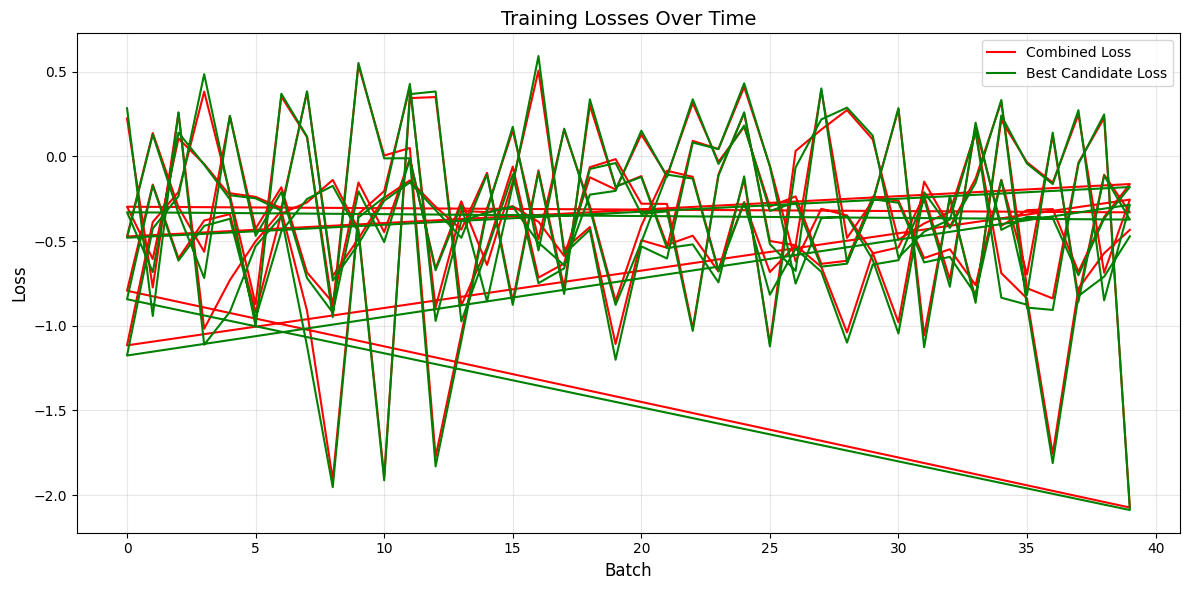

In [3]:
import sys
sys.path.append(r"C:\Users\BMSCE CSE.DESKTOP-IUB6THA\Downloads\kshitij\UniEval")
from utils import convert_to_json
from metric.evaluator import get_evaluator
import time
import os
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
import random
import traceback

sum_eval = get_evaluator("summarization", device="cuda")
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE} for training")
timestamp = time.strftime("%Y%m%d-%H%M%S")
SAVE_DIR = rf"D:\kshitij-weights-folder\reward_model_best_{timestamp}"

@torch.inference_mode()
def get_unieval_scores(src, hyp, ref):
    """Get UniEval scores for generated summaries"""
    data = convert_to_json(
        output_list=hyp,
        src_list=src,
        ref_list=ref,
    )
    try:
        raw = sum_eval.evaluate(data)
        scores = [
            [d["coherence"], d["consistency"], d["fluency"], d["relevance"]]
            for d in raw
        ]
        return torch.tensor(scores, dtype=torch.float32)
    except Exception as e:
        print(f"Error in UniEval: {e}")
        return torch.tensor([[0.5, 0.5, 0.5, 0.5]] * len(src), dtype=torch.float32)

df = pd.read_csv(r"C:\Users\BMSCE CSE.DESKTOP-IUB6THA\Downloads\kshitij\combined_clinical_notes.csv")[["dialogue", "note"]]

MEDICAL_PROMPTS = [
    "Summarize the following conversation:\n\n",
    "Generate a concise medical summary of the conversation:\n\n",
    "Extract key medical information from the following conversation:\n\n",
    "Provide a summary of this medical dialogue:\n\n"
]

class ClinicalDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=512, prompt_templates=None):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.prompt_templates = prompt_templates or [MEDICAL_PROMPTS[0]]
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        dialogue = str(self.df.iloc[idx]["dialogue"])
        reference = str(self.df.iloc[idx]["note"])
        
        prompt_template = random.choice(self.prompt_templates)
        prompt = f"{prompt_template}{dialogue}"
        
        inputs = self.tokenizer(
            prompt, 
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )
        
        return {
            "input_ids": inputs.input_ids.squeeze(),
            "attention_mask": inputs.attention_mask.squeeze(),
            "prompt": prompt,
            "prompt_template": prompt_template,
            "reference": reference,
            "dialogue": dialogue
        }

sample_size = min(40, len(df))
dataset = ClinicalDataset(df.sample(sample_size, random_state=42), tokenizer, prompt_templates=MEDICAL_PROMPTS)
loader = DataLoader(dataset, batch_size=1, shuffle=True)

NUM_EPOCHS = 5
NUM_CANDIDATES = 4
LEARNING_RATE = 3e-5

optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=0.01)

scheduler = ReduceLROnPlateau(
    optimizer, 
    mode='max',
    factor=0.5, 
    patience=2,
    verbose=True
)

all_metrics = []
best_score_so_far = 0
best_model_path = os.path.join(SAVE_DIR, "best_model")

def train_with_rewards():
    print("Starting enhanced reward-based training")
    global best_score_so_far
    
    for epoch in range(NUM_EPOCHS):
        print(f"\n{'='*30}\nEpoch {epoch+1}/{NUM_EPOCHS}\n{'='*30}")
        epoch_metrics = []
        
        for batch_idx, batch in enumerate(tqdm(loader, desc=f"Epoch {epoch+1}")):
            try:
                input_ids = batch["input_ids"].to(DEVICE)
                attention_mask = batch["attention_mask"].to(DEVICE)
                dialogue = batch["dialogue"][0]
                reference = batch["reference"][0]
                prompt_template = batch["prompt_template"][0]
                
                candidates = []
                candidate_texts = []
                
                for i in range(NUM_CANDIDATES):
                    temp = 0.6 + (i * 0.1)
                    p = 0.9 + (i * 0.02)
                    
                    with torch.no_grad():
                        generated = model.generate(
                            input_ids=input_ids,
                            attention_mask=attention_mask,
                            do_sample=True,
                            temperature=temp,
                            max_new_tokens=128,
                            top_p=min(p, 0.98),
                            top_k=50,
                            num_return_sequences=1,
                            pad_token_id=tokenizer.eos_token_id,
                            no_repeat_ngram_size=3
                        )
                    
                    text = tokenizer.decode(generated[0], skip_special_tokens=True)
                    prompt = batch["prompt"][0]
                    if prompt in text:
                        text = text[len(prompt):].strip()
                    
                    candidate_texts.append(text)
                    candidates.append(generated)
                
                scores = get_unieval_scores(
                    src=[dialogue] * NUM_CANDIDATES,
                    hyp=candidate_texts,
                    ref=[reference] * NUM_CANDIDATES
                ).numpy()
                
                total_scores = scores.sum(axis=1)
                best_idx = np.argmax(total_scores)
                best_score = total_scores[best_idx]
                worst_idx = np.argmin(total_scores)
                
                optimizer.zero_grad()
                
                outputs_best = model(
                    input_ids=candidates[best_idx],
                    labels=candidates[best_idx],
                    return_dict=True
                )
                loss_best = outputs_best[0]
                if loss_best.dim()>0:
                    loss_best = loss_best.mean()
                    
                if best_idx != worst_idx:
                    outputs_worst = model(
                        input_ids=candidates[worst_idx],
                        labels=candidates[worst_idx],
                        return_dict=True
                    )
                    if outputs_worst[0].dim()>0:
                        loss_worst = outputs_worst[0].mean()
                        
                    loss_worst = -0.2 * loss_worst
                else:
                    loss_worst = 0
                
                score_range = best_score - total_scores[worst_idx] if best_idx != worst_idx else 1.0
                loss = loss_best + (loss_worst * min(score_range, 1.0)) if best_idx != worst_idx else loss_best
                
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()
                
                metric_entry = {
                    "batch": batch_idx,
                    "epoch": epoch,
                    "best_score": best_score,
                    "worst_score": total_scores[worst_idx] if best_idx != worst_idx else None,
                    "loss": loss.item(),
                    "best_loss": loss_best.item(),
                    "prompt_template": prompt_template
                }
                
                epoch_metrics.append(metric_entry)
                
            except Exception as e:
                print(f"Error processing batch {batch_idx}: {e}")
                print("\n❌ Error in loss calculation and backpropagation:")
                print(f"Error type: {type(e).__name__}")
                print(f"Error message: {str(e)}")

                traceback.print_exc()
                return
                # continue
        
        save_path = os.path.join(SAVE_DIR, f"epoch_{epoch+1}")
        os.makedirs(save_path, exist_ok=True)
        model.save_pretrained(save_path)
        tokenizer.save_pretrained(save_path)
        
        if epoch_metrics:
            epoch_avg_score = np.mean([m["best_score"] for m in epoch_metrics])
            scheduler.step(epoch_avg_score)
            
            if epoch_avg_score > best_score_so_far:
                best_score_so_far = epoch_avg_score
                os.makedirs(best_model_path, exist_ok=True)
                model.save_pretrained(best_model_path)
                tokenizer.save_pretrained(best_model_path)
                
        all_metrics.extend(epoch_metrics)
        metrics_df = pd.DataFrame(all_metrics)
        metrics_df.to_csv(os.path.join(SAVE_DIR, "training_metrics.csv"), index=False)
    
    return all_metrics

# Run the training
metrics = train_with_rewards()

metrics_df = pd.DataFrame(metrics)

# Plot best scores
plt.figure(figsize=(12, 6))
plt.plot(metrics_df["batch"], metrics_df["best_score"], marker='o', linestyle='-', color='blue')
plt.xlabel('Batch', fontsize=12)
plt.ylabel('Best Candidate Score', fontsize=12)
plt.title('Training Progress: Best Candidate Score Over Time', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "training_progress.png"), dpi=300)
plt.close()

# Plot losses
plt.figure(figsize=(12, 6))
plt.plot(metrics_df["batch"], metrics_df["loss"], label='Combined Loss', color='red')
plt.plot(metrics_df["batch"], metrics_df["best_loss"], label='Best Candidate Loss', color='green')
if "worst_loss" in metrics_df.columns:
    plt.plot(metrics_df["batch"], metrics_df["worst_loss"], label='Worst Candidate Loss', color='orange')
plt.xlabel('Batch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Losses Over Time', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "training_losses.png"), dpi=300)

# Create a quick validation test
print("\nRunning quick validation test...")
test_samples = 3
test_df = df.sample(test_samples, random_state=99)  # Different seed from training

for _, row in test_df.iterrows():
    dialogue = str(row["dialogue"])
    reference = str(row["note"])
    
    # Create prompt
    prompt = f"{MEDICAL_PROMPTS[0]}{dialogue}"
    
    # Tokenize
    inputs = tokenizer(
        prompt, 
        return_tensors="pt"
    ).to(DEVICE)
    
    # Generate summary with the best model
    with torch.no_grad():
        generated = model.generate(
            input_ids=inputs.input_ids,
            attention_mask=inputs.attention_mask,
            do_sample=False,  # Use greedy for validation
            max_new_tokens=128,
            num_beams=3
        )
    
    # Decode
    generated_text = tokenizer.decode(generated[0], skip_special_tokens=True)
    
    # Extract only the generated part
    if prompt in generated_text:
        summary = generated_text[len(prompt):].strip()
    else:
        summary = generated_text
    
    print(f"\nDialogue: {dialogue[:100]}...")
    print(f"Reference: {reference[:100]}...")
    print(f"Generated: {summary[:100]}...")

print(f"\nTraining complete! Models saved to {SAVE_DIR}")

In [1]:
def return_prompt(conv):
    prompt = f"""
    CONVERSATION:
    {conv}
    
    SUMMARY:
    Please generate a medical summary based on the following clinical notes. The summary should include the following sections: Chief Complaint, History of Present Illness, Vitals, Physical Exam, Results, Assessment, Plan, and Instructions.
    Please format the response as plain text, without using markdown or special formatting, and with clear headings for each section, like this:
    
    
    CHIEF COMPLAINT
    A concise statement of the patient's primary concern or reason for visiting the clinic.
    
    HISTORY OF PRESENT ILLNESS
    A detailed narrative about the patient's symptoms, their onset, duration, and any relevant medical history or previous treatments.
    
    VITALS
    Include any relevant vital signs (e.g., oxygen saturation, blood pressure) if available.
    
    PHYSICAL EXAM 
    Summarize the findings from the physical examination, including any notable abnormalities.
    
    RESULTS 
    Summarize the results of any diagnostic tests performed (e.g., lab work, imaging studies).
    
    ASSESSMENT
    The doctor's assessment of the patient's condition or diagnosis.
    
    PLAN
    The treatment plan, including prescribed medications, lifestyle recommendations, and follow-up instructions.
    
    INSTRUCTIONS
    Specific instructions for the patient regarding their treatment plan and follow-up care.
    
    Important Note: If any section lacks relevant information or if specific details are not provided (e.g., vitals are not mentioned, no abnormal findings in the physical exam), omit that section from the generated summary. Only include sections for which there is sufficient information available.
    """

    return prompt

In [ ]:
# ════════════════════════════════════════════════════════════════
# Testing Script for Custom Reward-Based Trained Model
# ════════════════════════════════════════════════════════════════
import os
import torch
import pandas as pd
from tqdm import tqdm
import numpy as np

# Check if CUDA is available for inference
CUDA_AVAILABLE = torch.cuda.is_available()
DEVICE = "cuda" if CUDA_AVAILABLE else "cpu"
print(f"Using device: {DEVICE} for inference")

# ────────────────────────────────────────────────────────────────
# 1) Load the trained model weights
# ────────────────────────────────────────────────────────────────
from peft import PeftModel, prepare_model_for_kbit_training
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

# Path to the saved model
MODEL_PATH = r"D:\kshitij-weights-folder\reward-model-qwen\best"

# 4-bit quantization config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
)

# Load base model with 4-bit quantization
print(f"Loading base model from {MODEL_PATH}")
base_model = AutoModelForCausalLM.from_pretrained(
    MODEL_PATH,
    quantization_config=bnb_config,
    device_map="auto",
)
base_model = prepare_model_for_kbit_training(base_model)
base_model.gradient_checkpointing_disable()  # Disable for inference

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Load Peft adapter
model = PeftModel.from_pretrained(base_model, MODEL_PATH)
model = model.to(DEVICE)
model.eval()

# Ensure pad token settings
tokenizer.padding_side = "left"  # Important for decoder-only models
model.config.pad_token_id = tokenizer.pad_token_id

# Use the same prompt format that was used during training

# ────────────────────────────────────────────────────────────────
# 2) Prepare test dataset
# ────────────────────────────────────────────────────────────────
# Load test data
df = pd.read_csv(r"C:\Users\BMSCE CSE.DESKTOP-IUB6THA\Downloads\kshitij\combined_clinical_notes.csv")
test_df = df.sample(20, random_state=42)  # Using 20 samples for testing

# Prepare test dialogues and references
dialogues = test_df["dialogue"].tolist()
references = test_df["note"].tolist()

# ────────────────────────────────────────────────────────────────
# 3) Generate summaries using trained model
# ────────────────────────────────────────────────────────────────
print("Generating summaries...")
batch_size = 4
num_samples = len(dialogues)
num_batches = (num_samples + batch_size - 1) // batch_size
predictions = []

for i in tqdm(range(num_batches)):
    start, end = i*batch_size, min((i+1)*batch_size, num_samples)
    convs = dialogues[start:end]
    
    # Use the same prompt format as during training
    prompts = [
        return_prompt(c)
        for c in convs if len(str(c).strip()) > 10
    ]
    
    if not prompts:
        continue
    
    # Tokenize
    enc = tokenizer(
        prompts,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    ).to(DEVICE)
    
    # Generate with improved parameters matching training
    with torch.no_grad():
        out_ids = model.generate(
            input_ids=enc.input_ids,
            attention_mask=enc.attention_mask,
            max_new_tokens=128,
            do_sample=True,
            temperature=0.7,
            top_p=0.92,
            top_k=50,
            num_beams=3,
            no_repeat_ngram_size=3
        )
    
    # Decode
    dec = tokenizer.batch_decode(out_ids, skip_special_tokens=True)
    
    # Extract only the generated part
    cleaned_predictions = []
    for p, original_prompt in zip(dec, prompts):
        if original_prompt in p:
            generated_part = p[p.find(original_prompt) + len(original_prompt):]
            cleaned_predictions.append(generated_part.strip())
        else:
            cleaned_predictions.append(p.strip())
    
    predictions.extend(cleaned_predictions)

print(f"✅ Generated {len(predictions)} summaries.")

# ────────────────────────────────────────────────────────────────
# 4) Evaluate with UniEval
# ────────────────────────────────────────────────────────────────
import sys
sys.path.append(r"C:\Users\BMSCE CSE.DESKTOP-IUB6THA\Downloads\kshitij\UniEval")
from utils import convert_to_json
from metric.evaluator import get_evaluator

# Keep UniEval on CPU
sum_eval = get_evaluator("summarization", device="cuda")
fact_eval = get_evaluator("fact", device="cuda")

# Trim predictions and references to the same length
min_len = min(len(predictions), len(references), len(dialogues))
predictions = predictions[:min_len]
references = references[:min_len]
dialogues = dialogues[:min_len]

# Create JSON data for UniEval
print("Creating evaluation data...")
data = convert_to_json(
    src_list=[str(d) for d in dialogues],
    ref_list=[str(r) for r in references],
    output_list=[str(p) for p in predictions]
)

# Run evaluation
print("Running UniEval...")
scores = sum_eval.evaluate(data, print_result=True)
fact_eval.evaluate(data, print_result=True)

# ────────────────────────────────────────────────────────────────
# 5) Display results
# ────────────────────────────────────────────────────────────────
coherence_scores = [item["coherence"] for item in scores]
consistency_scores = [item["consistency"] for item in scores]
fluency_scores = [item["fluency"] for item in scores]
relevance_scores = [item["relevance"] for item in scores]

avg_coherence = sum(coherence_scores) / len(coherence_scores)
avg_consistency = sum(consistency_scores) / len(consistency_scores)
avg_fluency = sum(fluency_scores) / len(fluency_scores)
avg_relevance = sum(relevance_scores) / len(relevance_scores)

print("\n=== Summary Evaluation Results ===")
print(f"Average Coherence: {avg_coherence:.4f}")
print(f"Average Consistency: {avg_consistency:.4f}")
print(f"Average Fluency: {avg_fluency:.4f}")
print(f"Average Relevance: {avg_relevance:.4f}")
print(f"Overall Average: {(avg_coherence + avg_consistency + avg_fluency + avg_relevance) / 4:.4f}")

# ────────────────────────────────────────────────────────────────
# 6) Sample output comparison
# ────────────────────────────────────────────────────────────────
print("\n=== Sample Output Comparison ===")
for i in range(min(3, min_len)):
    print(f"\nExample {i+1}:")
    print(f"Dialogue: {dialogues[i][:100]}...")
    print(f"Reference: {references[i][:100]}...")
    print(f"Generated: {predictions[i][:100]}...")
    print(f"Scores: Coherence={coherence_scores[i]:.2f}, Consistency={consistency_scores[i]:.2f}, "
          f"Fluency={fluency_scores[i]:.2f}, Relevance={relevance_scores[i]:.2f}")

# ────────────────────────────────────────────────────────────────
# 7) Save results
# ────────────────────────────────────────────────────────────────
results_df = pd.DataFrame({
    'dialogue': dialogues[:min_len],
    'reference': references[:min_len],
    'prediction': predictions[:min_len],
    'coherence': coherence_scores,
    'consistency': consistency_scores,
    'fluency': fluency_scores,
    'relevance': relevance_scores
})

results_file = "reward_training_evaluation_results.csv"
results_df.to_csv(results_file, index=False)
print(f"\nResults saved to {results_file}")

# ────────────────────────────────────────────────────────────────
# 8) Compare with different generation settings
# ────────────────────────────────────────────────────────────────
print("\n=== Testing alternative generation settings ===")

alt_predictions = []

for i in tqdm(range(min(5, num_batches))):
    start, end = i*batch_size, min((i+1)*batch_size, num_samples)
    convs = dialogues[start:end]
    
    prompts = [
        f"{PROMPT_TEMPLATE}{c}"
        for c in convs if len(str(c).strip()) > 10
    ]
    
    if not prompts:
        continue
    
    enc = tokenizer(
        prompts,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    ).to(DEVICE)
    
    # Use greedy decoding
    with torch.no_grad():
        alt_ids = model.generate(
            input_ids=enc.input_ids,
            attention_mask=enc.attention_mask,
            max_new_tokens=128,
            do_sample=False,
            num_beams=5,
            no_repeat_ngram_size=3
        )
    
    dec = tokenizer.batch_decode(alt_ids, skip_special_tokens=True)
    
    cleaned = []
    for p, original_prompt in zip(dec, prompts):
        if original_prompt in p:
            generated_part = p[p.find(original_prompt) + len(original_prompt):]
            cleaned.append(generated_part.strip())
        else:
            cleaned.append(p.strip())
    
    alt_predictions.extend(cleaned)

if alt_predictions:
    max_alt_len = min(len(alt_predictions), min_len)
    alt_dialogues = dialogues[:max_alt_len]
    alt_references = references[:max_alt_len]
    alt_predictions = alt_predictions[:max_alt_len]
    
    alt_data = convert_to_json(
        src_list=[str(d) for d in alt_dialogues],
        ref_list=[str(r) for r in alt_references],
        output_list=[str(p) for p in alt_predictions]
    )
    
    print("Evaluating alternative generation settings...")
    alt_scores = sum_eval.evaluate(alt_data, print_result=True)
    
    alt_avg_coherence = sum([s["coherence"] for s in alt_scores]) / len(alt_scores)
    alt_avg_consistency = sum([s["consistency"] for s in alt_scores]) / len(alt_scores)
    alt_avg_fluency = sum([s["fluency"] for s in alt_scores]) / len(alt_scores)
    alt_avg_relevance = sum([s["relevance"] for s in alt_scores]) / len(alt_scores)
    
    print("\n=== Alternative Settings Evaluation Results ===")
    print(f"Average Coherence: {alt_avg_coherence:.4f}")
    print(f"Average Consistency: {alt_avg_consistency:.4f}")
    print(f"Average Fluency: {alt_avg_fluency:.4f}")
    print(f"Average Relevance: {alt_avg_relevance:.4f}")
    print(f"Overall Average: {(alt_avg_coherence + alt_avg_consistency + alt_avg_fluency + alt_avg_relevance) / 4:.4f}")

Using device: cuda for inference


C:\Users\BMSCE CSE.DESKTOP-IUB6THA\.conda\envs\kshitij\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading base model from D:\kshitij-weights-folder\reward-model-qwen\best


C:\Users\BMSCE CSE.DESKTOP-IUB6THA\.conda\envs\kshitij\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading checkpoint shards: 100%|███████████████████████████████████████████████| 4/4 [00:15<00:00,  3.93s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Generating summaries...


 80%|███████████████████████████████████████████████████████████▏              | 4/5 [01:54<00:28, 28.75s/it]

In [ ]:
import torch
import transformers
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM, DataCollatorForLanguageModeling, Trainer, TrainingArguments, BitsAndBytesConfig
from datasets import Dataset
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from peft import PeftModel
from tqdm import tqdm

In [ ]:
DATA = r"C:\Users\BMSCE CSE.DESKTOP-IUB6THA\Downloads\kshitij\combined_clinical_notes.csv"
df = pd.read_csv(DATA)

# First split: 60% train, 40% temp (eval + test)
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)

# Second split: 50% of temp (which is 20% of total) for eval, 50% for test
eval_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
train_df.head(1)

In [ ]:
# -- Path to your LoRA weights + tokenizer --
model_dir = r"D:\kshitij-weights-folder\reward-model-qwen\best"  

# -- 4-bit quantization config (same as training) --
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
)

# -- 1) Load the *base* Qwen2.5 model in 4-bit --
base_model = AutoModelForCausalLM.from_pretrained(
    "HPAI-BSC/Qwen2.5-Aloe-Beta-7B",
    quantization_config=bnb_config,
    device_map="auto",
)

# model = AutoModelForCausalLM.from_pretrained(base_model_name)
# model = PeftModel.from_pretrained(model, adapter_model_name)

# -- 2) Load your fine-tuned LoRA adapters into the base model --
# The directory should contain adapter_model.bin, adapter_config.json, etc.
lora_model = PeftModel.from_pretrained(
    base_model, 
    model_dir,
    device_map="auto",
)

# -- 3) Load the tokenizer you saved to ./aloe_qwen --
tokenizer = AutoTokenizer.from_pretrained(model_dir)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"

In [ ]:
def return_prompt(conv):
    prompt = f"""
    CONVERSATION:
    {conv}
    
    SUMMARY:
    Please generate a medical summary based on the following clinical notes. The summary should include the following sections: Chief Complaint, History of Present Illness, Vitals, Physical Exam, Results, Assessment, Plan, and Instructions.
    Please format the response as plain text, without using markdown or special formatting, and with clear headings for each section, like this:
    
    
    CHIEF COMPLAINT
    A concise statement of the patient's primary concern or reason for visiting the clinic.
    
    HISTORY OF PRESENT ILLNESS
    A detailed narrative about the patient's symptoms, their onset, duration, and any relevant medical history or previous treatments.
    
    VITALS
    Include any relevant vital signs (e.g., oxygen saturation, blood pressure) if available.
    
    PHYSICAL EXAM 
    Summarize the findings from the physical examination, including any notable abnormalities.
    
    RESULTS 
    Summarize the results of any diagnostic tests performed (e.g., lab work, imaging studies).
    
    ASSESSMENT
    The doctor's assessment of the patient's condition or diagnosis.
    
    PLAN
    The treatment plan, including prescribed medications, lifestyle recommendations, and follow-up instructions.
    
    INSTRUCTIONS
    Specific instructions for the patient regarding their treatment plan and follow-up care.
    
    Important Note: If any section lacks relevant information or if specific details are not provided (e.g., vitals are not mentioned, no abnormal findings in the physical exam), omit that section from the generated summary. Only include sections for which there is sufficient information available.
    """

    return prompt

In [ ]:
eval_df = test_df

eval_df.head(1)

In [ ]:
from transformers import pipeline
summarizer = pipeline(
    "text-generation",
    model=lora_model,
    tokenizer=tokenizer,
    device_map="auto",  # Automatically place on GPU if available
)

# notechat = load_dataset("akemiH/NoteChat")
# eval_df = notechat["train"].select(range(5000, 7001)).to_pandas()
eval_df = test_df[1:2]

# 2) Clean up missing data if present
# if eval_df.isnull().values.any():
#     print("Found missing values in the evaluation set. Dropping them.")
#     eval_df = eval_df.dropna()


# 3) Prepare batching parameters
batch_size = 4
num_samples = len(eval_df)
num_batches = (num_samples // batch_size) + int(num_samples % batch_size != 0)

# Lists to store predictions and references
predictions = []
references = []

# 4) Batching loop to generate summaries
for i in tqdm(range(num_batches), desc="Generating Summaries"):
    start = i * batch_size
    end = min(start + batch_size, num_samples)
    
    # Extract conversation and reference summary columns
    batch_conversations = eval_df["dialogue"][start:end].tolist()
    batch_refs = eval_df["note"][start:end].tolist()  # "data" column for references

    # Prepare prompts replicating training format
    prompts = [
        return_prompt(conv)
        for conv in batch_conversations
    ]
    
    # Generate summaries
    results = summarizer(
        prompts,
        max_new_tokens=900,
        do_sample=False,
        # truncation=True,
        # num_return_sequences=1  # Default is 1
    )
    
    # Parse results and extract summaries
    for item in results:
        # 'item' is a list with 1 dict => {"generated_text": "..."}
        output_dict = item[0]
        generated_text = output_dict["generated_text"]
        
        # Extract only the part after "SUMMARY:"
        # if "SUMMARY:" in full_text:
        #     extracted_summary = generated_text.split("SUMMARY:", 1)[-1].strip()
        # else:
        #     extracted_summary = generated_text  # Fallback if marker not found

        # first_occurrence = generated_text.lower().find("chief complaint")
        # second_occurrence = generated_text.lower().find("chief complaint", first_occurrence + 1)
        # third_occurrence = generated_text.lower().find("chief complaint", second_occurrence + 1)
        # fourth_occurrence = generated_text.lower().find("chief complaint", third_occurrence + 1)
        
        # if fourth_occurrence != -1:
        #     # Extract everything from the second occurrence of "CHIEF COMPLAINT" onward
        #     extracted_summary = generated_text[fourth_occurrence:].strip()
        # else:
        #     # If the second "CHIEF COMPLAINT" is not found, just use the original text
        #     extracted_summary = generated_text.strip()

        # cleaned = extract_from_second_occurrence(generated_text)
        cleaned = generated_text[len(prompts[0]):]
        predictions.append(cleaned)
    
    # Append the reference texts
    references.extend(batch_refs)

In [ ]:
print(predictions[0])